 # Titanic Survival Exploration with Decision Trees


## 1. Import the libraries 

In [21]:
import pandas as pd 
import random 
random.seed(42)
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2. Import the data 

In [7]:
df=pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Recall that these are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger 
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger 
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

## 3. Explore and prepare the data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 'Name' column have high cardinality( too many unique values )
Drop this columns 

In [8]:
df.drop(columns=["Name"],inplace=True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## 4.split into X and y 

In [9]:
X=df.drop(columns="Survived")
y=df["Survived"]

In [11]:
X=pd.get_dummies(X)   

let's now fill the null values we have

In [12]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
X=X.fillna(0.0)

In [14]:
X.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
              ..
Cabin_G6       0
Cabin_T        0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Length: 839, dtype: int64

## 5.split the data set into training set and testing set 

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## 6.Build the model 

In [16]:
model=DecisionTreeClassifier(random_state=42)

In [17]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

## 7.Test the model 

In [18]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)                          

In [19]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.8156424581005587


We have an overfitting problem. The model doesn't generalize well 

## 8.Improve the model 

In [54]:
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, min_samples_split=7)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, min_samples_split=7)

In [55]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)                          

In [56]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8679775280898876
The test accuracy is 0.8435754189944135


## 9. visualize the decision tree

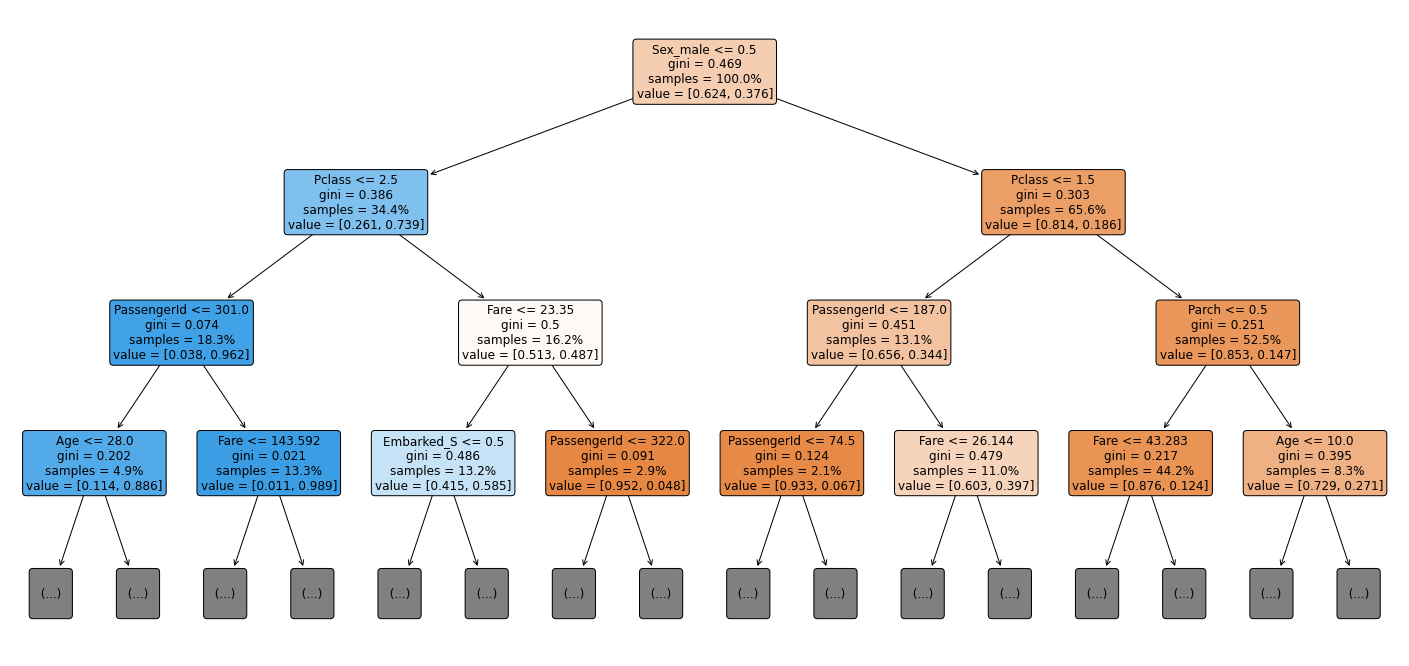

In [57]:
fig,ax=plt.subplots(figsize=(25,12))
plot_tree(decision_tree=model,
         feature_names=X_train.columns,
         filled=True,
         rounded=True,
         proportion=True,
         max_depth=3,
         fontsize=12,
         ax=ax);

Note: Tuning hyperparameters will be learned in lesson 9 